## Assignment 2

##Importing Libraries.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


##Loading the Data.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Data_Mining_Assignment_2/covid_19_data (1).csv')

data_modified = pd.read_csv('/content/drive/MyDrive/Data_Mining_Assignment_2/COVID19_line_list_data_modified (1).csv')

In [7]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [8]:
data_modified.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,12/29/2019,1/4/2020,1,0.0,0,0,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,1/12/2020,0,1.0,0,0,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,0.0,1/17/2020,NaN,1/3/2020,0,1.0,0,0,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN


##Transforming & Merging the Datasets.

In [10]:
# Standardize column names
data.rename(columns={'ObservationDate': 'date', 'Country/Region': 'country', 'Deaths': 'deaths', 'Recovered': 'recovered'}, inplace=True)
data_modified.rename(columns={'reporting date': 'date', 'death': 'deaths', 'recovered': 'recovered'}, inplace=True)

# Convert date columns to datetime format
data['date'] = pd.to_datetime(data['date'])
data_modified['date'] = pd.to_datetime(data_modified['date'])

# Merge the datasets on 'country' and 'date'
merged_data = pd.merge(data,data_modified, on=['country', 'date'], how='outer')

In [11]:
# Display the first few rows of the merged dataset
print(merged_data.head())


   SNo       date Province/State         country      Last Update  Confirmed  \
0  1.0 2020-01-22          Anhui  Mainland China  1/22/2020 17:00        1.0   
1  2.0 2020-01-22        Beijing  Mainland China  1/22/2020 17:00       14.0   
2  3.0 2020-01-22      Chongqing  Mainland China  1/22/2020 17:00        6.0   
3  4.0 2020-01-22         Fujian  Mainland China  1/22/2020 17:00        1.0   
4  5.0 2020-01-22          Gansu  Mainland China  1/22/2020 17:00        0.0   

   deaths_x  recovered_x  id  case_in_country  ...  symptom_onset  \
0       0.0          0.0 NaN              NaN  ...            NaN   
1       0.0          0.0 NaN              NaN  ...            NaN   
2       0.0          0.0 NaN              NaN  ...            NaN   
3       0.0          0.0 NaN              NaN  ...            NaN   
4       0.0          0.0 NaN              NaN  ...            NaN   

  If_onset_approximated hosp_visit_date exposure_start  exposure_end  \
0                   NaN         

In [12]:
# Check for missing values
print(merged_data.isnull().sum())

SNo                       247
date                        1
Province/State           4503
country                     0
Last Update               247
Confirmed                 247
deaths_x                  247
recovered_x               247
id                       8234
case_in_country          8431
Unnamed: 3               9361
summary                  8239
location                 8234
gender                   8417
age                      8476
symptom_onset            8789
If_onset_approximated    8792
hosp_visit_date          8848
exposure_start           9233
exposure_end             9005
visiting Wuhan           8234
from Wuhan               8238
deaths_y                 8234
recovered_y              8234
symptom                  9091
dtype: int64


##Data Cleaning.

In [13]:
# Fill missing values in merged_data
merged_data['Province/State'].fillna('Unknown', inplace=True)
merged_data['case_in_country'].fillna(-1, inplace=True)
merged_data['gender'].fillna('Unknown', inplace=True)
merged_data['age'].fillna(-1, inplace=True)
merged_data['symptom_onset'].fillna('Unknown', inplace=True)
merged_data['If_onset_approximated'].fillna(-1, inplace=True)
merged_data['hosp_visit_date'].fillna('Unknown', inplace=True)
merged_data['exposure_start'].fillna('Unknown', inplace=True)
merged_data['exposure_end'].fillna('Unknown', inplace=True)
merged_data['visiting Wuhan'].fillna(-1, inplace=True)
merged_data['from Wuhan'].fillna(-1, inplace=True)
merged_data['symptom'].fillna('Unknown', inplace=True)

In [14]:
# Drop rows where essential data is missing
essential_columns = ['date', 'Confirmed', 'deaths_x', 'recovered_x']
merged_data.dropna(subset=essential_columns, inplace=True)

In [15]:
# Ensure numeric columns are of the correct type
merged_data['Confirmed'] = merged_data['Confirmed'].astype(int)
merged_data['deaths_x'] = merged_data['deaths_x'].astype(int)
merged_data['recovered_x'] = merged_data['recovered_x'].astype(int)
merged_data['age'] = merged_data['age'].astype(float)
merged_data['case_in_country'] = merged_data['case_in_country'].astype(int)
merged_data['If_onset_approximated'] = merged_data['If_onset_approximated'].astype(int)
merged_data['visiting Wuhan'] = merged_data['visiting Wuhan'].astype(int)
merged_data['from Wuhan'] = merged_data['from Wuhan'].astype(int)

In [16]:
# Remove duplicates
merged_data.drop_duplicates(inplace=True)

In [17]:
# Standardize country names
merged_data['country'] = merged_data['country'].str.strip().str.lower()

In [18]:
# Display the first few rows of the cleaned merged dataset
print(merged_data.head())

   SNo       date Province/State         country      Last Update  Confirmed  \
0  1.0 2020-01-22          Anhui  mainland china  1/22/2020 17:00          1   
1  2.0 2020-01-22        Beijing  mainland china  1/22/2020 17:00         14   
2  3.0 2020-01-22      Chongqing  mainland china  1/22/2020 17:00          6   
3  4.0 2020-01-22         Fujian  mainland china  1/22/2020 17:00          1   
4  5.0 2020-01-22          Gansu  mainland china  1/22/2020 17:00          0   

   deaths_x  recovered_x  id  case_in_country  ...  symptom_onset  \
0         0            0 NaN               -1  ...        Unknown   
1         0            0 NaN               -1  ...        Unknown   
2         0            0 NaN               -1  ...        Unknown   
3         0            0 NaN               -1  ...        Unknown   
4         0            0 NaN               -1  ...        Unknown   

  If_onset_approximated hosp_visit_date exposure_start  exposure_end  \
0                    -1         

In [19]:
# Check for remaining missing values
print(merged_data.isnull().sum())

SNo                         0
date                        0
Province/State              0
country                     0
Last Update                 0
Confirmed                   0
deaths_x                    0
recovered_x                 0
id                       8234
case_in_country             0
Unnamed: 3               9114
summary                  8234
location                 8234
gender                      0
age                         0
symptom_onset               0
If_onset_approximated       0
hosp_visit_date             0
exposure_start              0
exposure_end                0
visiting Wuhan              0
from Wuhan                  0
deaths_y                 8234
recovered_y              8234
symptom                     0
dtype: int64


In [20]:
# Drop unnecessary columns
columns_to_drop = ['id', 'Unnamed: 3', 'summary', 'location', 'deaths_y', 'recovered_y']
merged_data.drop(columns=columns_to_drop, inplace=True)

In [21]:
# Fill or drop missing values in remaining columns
merged_data.fillna({
    'symptom_onset': 'Unknown',
    'hosp_visit_date': 'Unknown',
    'exposure_start': 'Unknown',
    'exposure_end': 'Unknown',
    'symptom': 'Unknown'
}, inplace=True)

# Drop rows with remaining missing values if critical
merged_data.dropna(inplace=True)

In [22]:
# Check for remaining missing values
print(merged_data.isnull().sum())

SNo                      0
date                     0
Province/State           0
country                  0
Last Update              0
Confirmed                0
deaths_x                 0
recovered_x              0
case_in_country          0
gender                   0
age                      0
symptom_onset            0
If_onset_approximated    0
hosp_visit_date          0
exposure_start           0
exposure_end             0
visiting Wuhan           0
from Wuhan               0
symptom                  0
dtype: int64


##Data Preprocessing.

In [23]:
# Select relevant features for clustering
features = ['Confirmed', 'deaths_x', 'recovered_x', 'age', 'case_in_country']
data = merged_data[features]

In [24]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

##Model Building.

1)  K-Means Clustering

2) DBSCAN

##1. K-Means Clustering.

In [25]:
# 1. K-Means Clustering

# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

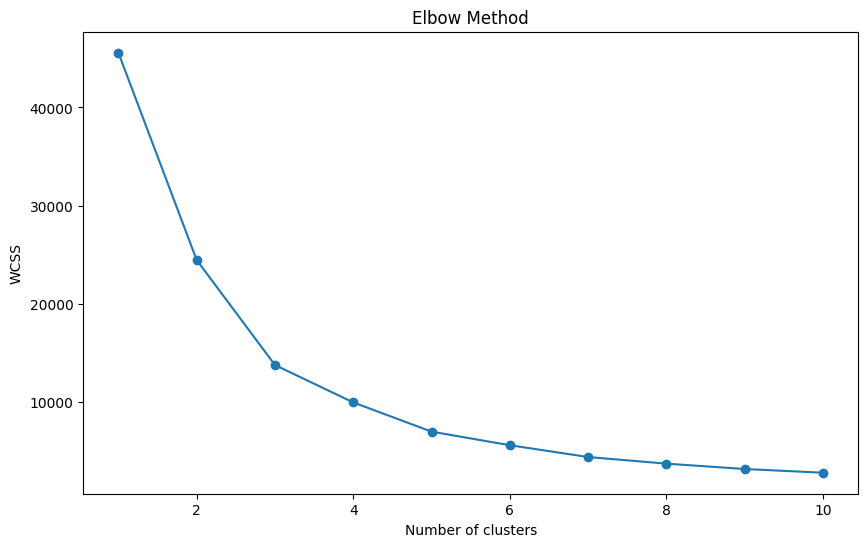

In [26]:
# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

In [28]:
# Evaluate K-Means clustering
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
print('K-Means Silhouette Score:', kmeans_silhouette)

K-Means Silhouette Score: 0.910131197394834


##2. DBSCAN.

In [29]:
# 2. DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

In [30]:
# Evaluate DBSCAN clustering
dbscan_silhouette = silhouette_score(data_scaled, dbscan_clusters)
print('DBSCAN Silhouette Score:', dbscan_silhouette)

DBSCAN Silhouette Score: 0.7965540340544877


##Visualizing Clusters.



In [31]:
# Visualize clustering results
# Add cluster labels to the dataframe
merged_data['KMeans_Cluster'] = kmeans_clusters

merged_data['DBSCAN_Cluster'] = dbscan_clusters

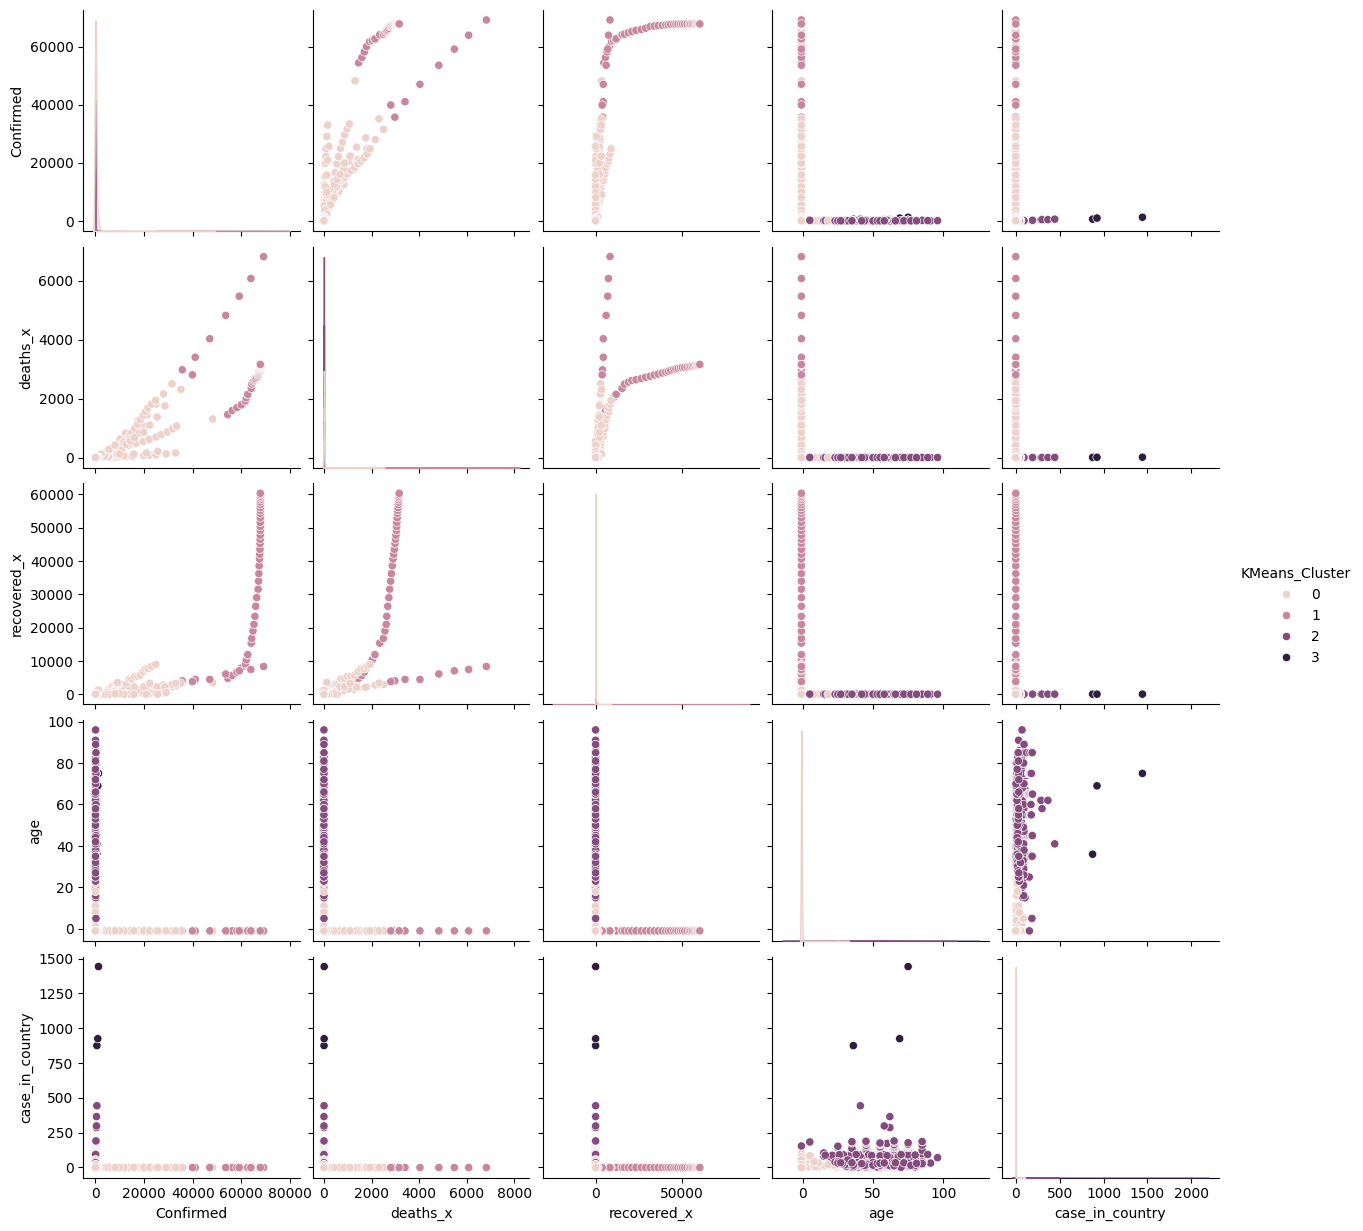

In [32]:
# Plot the clustering results
sns.pairplot(merged_data, hue='KMeans_Cluster', vars=features)
plt.show()


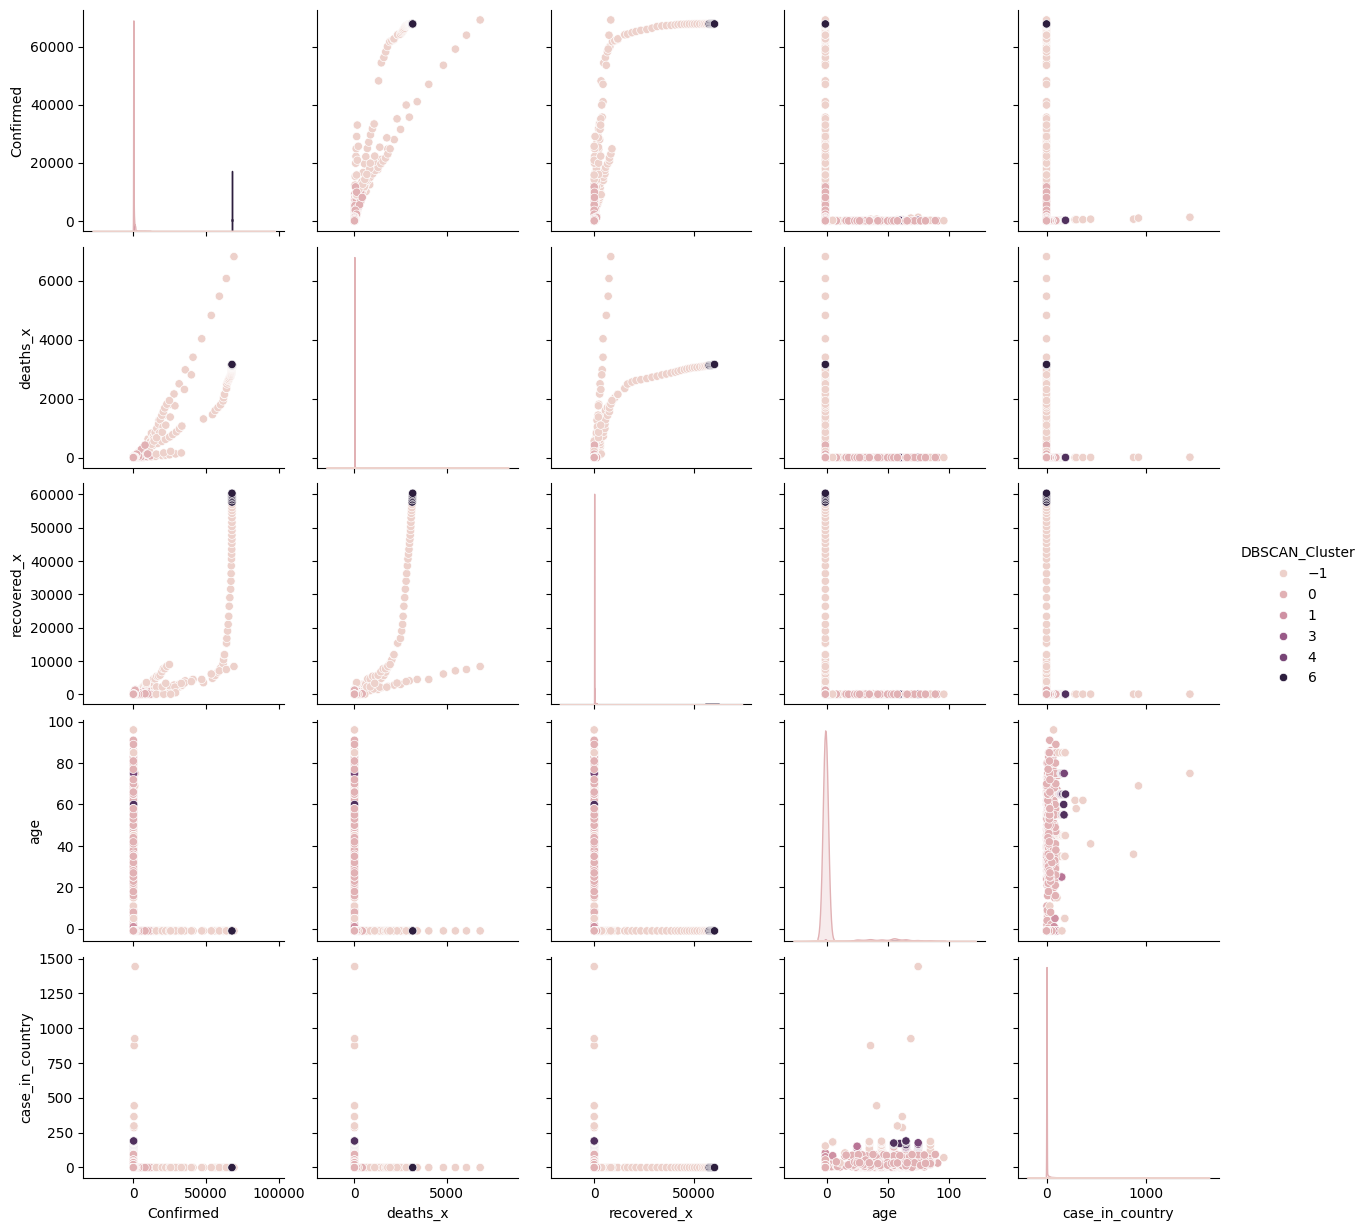

In [33]:
sns.pairplot(merged_data, hue='DBSCAN_Cluster', vars=features)
plt.show()

##Data Analysis.

##i). Highest and Second Highest Affected Areas.

In [36]:
# Group by 'Province/State' and 'country' and sum the 'Confirmed' cases
area_group = merged_data.groupby(['Province/State', 'country'])['Confirmed'].sum().reset_index()

# Sort the areas by the number of confirmed cases in descending order
sorted_area_group = area_group.sort_values(by='Confirmed', ascending=False)

# Get the highest and second highest affected areas
highest_affected_area = sorted_area_group.iloc[0]
second_highest_affected_area = sorted_area_group.iloc[1]

print('Highest affected area:')
print("-------------------------------")
print(highest_affected_area)

print(" ")

print('Second highest affected area:')
print("----------------------------")
print(second_highest_affected_area)

Highest affected area:
-------------------------------
Province/State             Hubei
country           mainland china
Confirmed                2962686
Name: 104, dtype: object
 
Second highest affected area:
----------------------------
Province/State    Unknown
country             italy
Confirmed          571926
Name: 361, dtype: object


Results:

- Highest affected area: Hubei, mainland China with 2,962,686 confirmed cases.
- Second highest affected area: Unknown, Italy with 571,926 confirmed cases.



##ii). Mortality vs. Recovery Ratio.

In [37]:
total_deaths = merged_data['deaths_x'].sum()
total_recoveries = merged_data['recovered_x'].sum()

# Calculate the mortality vs. recovery ratio
mortality_recovery_ratio = total_deaths / total_recoveries

print('Total deaths:', total_deaths)
print('Total recoveries:', total_recoveries)
print('Mortality vs. Recovery Ratio:', mortality_recovery_ratio)

Total deaths: 217830
Total recoveries: 2097800
Mortality vs. Recovery Ratio: 0.10383735341786633


Results:

- This means that for every recovery, there are approximately 0.104 deaths.

##iii). General Tendency Towards Particular Age, Gender, or Random.

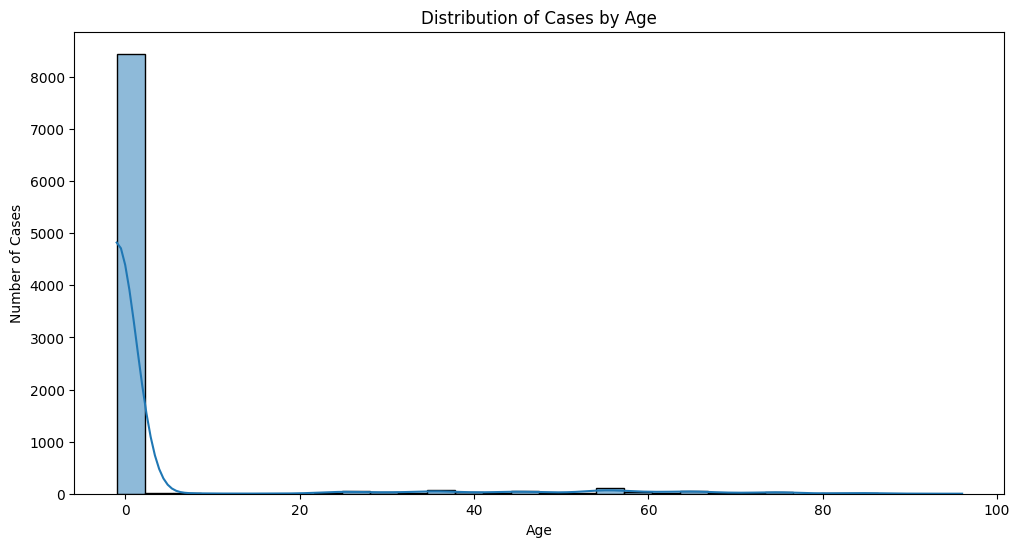

In [38]:
# Clean the 'age' and 'gender' columns

merged_data['age'] = pd.to_numeric(merged_data['age'], errors='coerce')
merged_data['gender'] = merged_data['gender'].str.lower()

# Plot the distribution of cases by age
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Cases by Age')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.show()

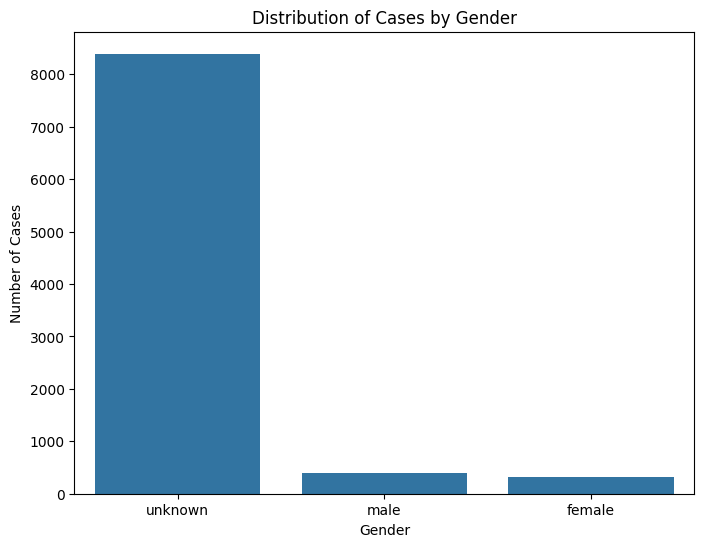

In [39]:
# Plot the distribution of cases by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=merged_data)
plt.title('Distribution of Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.show()

Results:

- The age distribution shows a concentration of cases in certain age groups.

- The gender distribution indicates the number of cases for each gender.

##iv). Mortality Rate Among Different Age Groups.

In [40]:
# Define age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)

# Calculate mortality rate for each age group
age_group_mortality = merged_data.groupby('age_group').apply(lambda x: x['deaths_x'].sum() / x['Confirmed'].sum()).reset_index(name='mortality_rate')

print(age_group_mortality)

  age_group  mortality_rate
0      0-10        0.011086
1     11-20        0.010610
2     21-30        0.009209
3     31-40        0.010074
4     41-50        0.009752
5     51-60        0.011318
6     61-70        0.012567
7     71-80        0.010761
8     81-90        0.015729
9    91-100        0.030612


Results:

- The mortality rate increases with age, with the highest rate observed in the 91-100 age group (3.06%).

- The lowest mortality rate is in the 21-30 age group (0.92%).


	Welcome to Covid-19 Data Analysis

1. Highest and Second Highest Affected Areas
2. Mortality vs. Recovery Ratio
3. General Tendency Towards Particular Age, Gender, or Random
4. Mortality Rate Among Different Age Groups
5. Exit


Enter your choice: 1
Highest affected area:
-------------------------------
Province/State             Hubei
country           mainland china
Confirmed                2962686
Name: 104, dtype: object
 
Second highest affected area:
----------------------------
Province/State    Unknown
country             italy
Confirmed          571926
Name: 361, dtype: object

	Welcome to Covid-19 Data Analysis

1. Highest and Second Highest Affected Areas
2. Mortality vs. Recovery Ratio
3. General Tendency Towards Particular Age, Gender, or Random
4. Mortality Rate Among Different Age Groups
5. Exit


Enter your choice: 2
Total deaths: 217830
Total recoveries: 2097800
Mortality vs. Recovery Ratio: 0.10383735341786633

	Welcome to Covid-19 Data Analysis

1. Highest and Seco

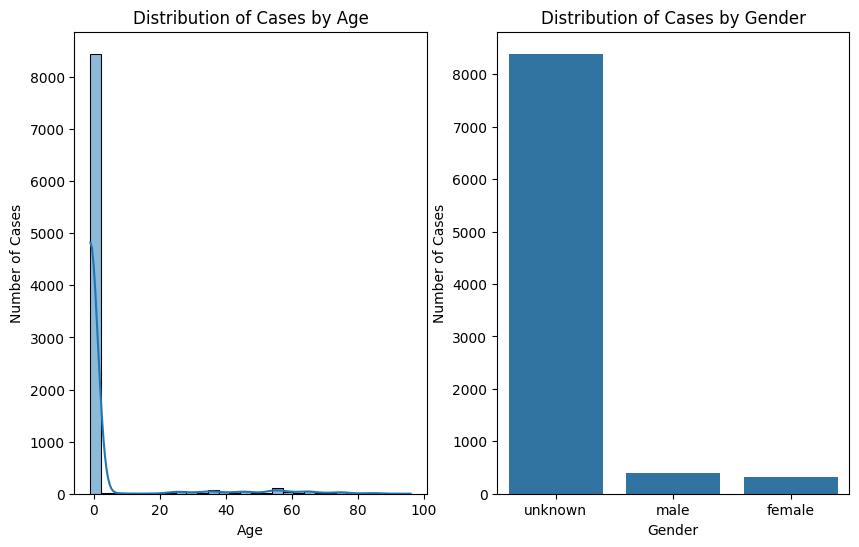


	Welcome to Covid-19 Data Analysis

1. Highest and Second Highest Affected Areas
2. Mortality vs. Recovery Ratio
3. General Tendency Towards Particular Age, Gender, or Random
4. Mortality Rate Among Different Age Groups
5. Exit


Enter your choice: 4
  age_group  mortality_rate
0      0-10        0.011086
1     11-20        0.010610
2     21-30        0.009209
3     31-40        0.010074
4     41-50        0.009752
5     51-60        0.011318
6     61-70        0.012567
7     71-80        0.010761
8     81-90        0.015729
9    91-100        0.030612
The mortality rate increases with age, with the highest rate observed in the 91-100 age group (3.06%).
 The lowest mortality rate is in the 21-30 age group (0.92%).

	Welcome to Covid-19 Data Analysis

1. Highest and Second Highest Affected Areas
2. Mortality vs. Recovery Ratio
3. General Tendency Towards Particular Age, Gender, or Random
4. Mortality Rate Among Different Age Groups
5. Exit


Enter your choice: 5
Thank you for using Cov

In [53]:
while True:
  print('\n\tWelcome to Covid-19 Data Analysis\n')
  print('1. Highest and Second Highest Affected Areas')
  print('2. Mortality vs. Recovery Ratio')
  print('3. General Tendency Towards Particular Age, Gender, or Random')
  print('4. Mortality Rate Among Different Age Groups')
  print('5. Exit')
  print('\n')
  choice = int(input('Enter your choice: '))
  if choice==1:
    print('Highest affected area:')
    print("-------------------------------")
    print(highest_affected_area)

    print(" ")

    print('Second highest affected area:')
    print("----------------------------")
    print(second_highest_affected_area)
  elif choice==2:
    print('Total deaths:', total_deaths)
    print('Total recoveries:', total_recoveries)
    print('Mortality vs. Recovery Ratio:', mortality_recovery_ratio)
  elif choice==3:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(merged_data['age'].dropna(), bins=30, kde=True)
    plt.title('Distribution of Cases by Age')
    plt.xlabel('Age')
    plt.ylabel('Number of Cases')
    plt.subplot(1, 2, 2)
    sns.countplot(x='gender', data=merged_data)
    plt.title('Distribution of Cases by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Number of Cases')
    plt.show()
  elif choice==4:
    print(age_group_mortality)
    print('The mortality rate increases with age, with the highest rate observed in the 91-100 age group (3.06%).\n The lowest mortality rate is in the 21-30 age group (0.92%).')
  elif choice==5:
    print('Thank you for using Covid-19 Data Analysis.')
    break
  else:
    print('Invalid Choice')